STEP 4: Density Matrix & Decoherence Analysis

Pure State Bloch Sphere


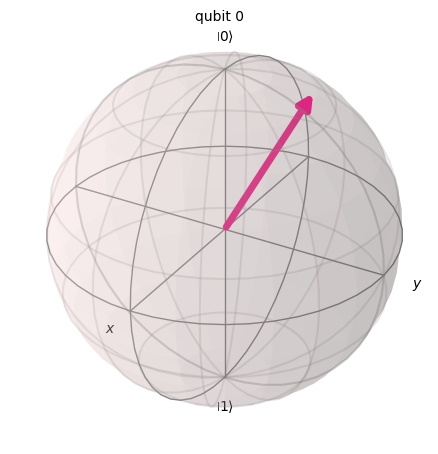

Mixed State Bloch Sphere (Shrinkage)


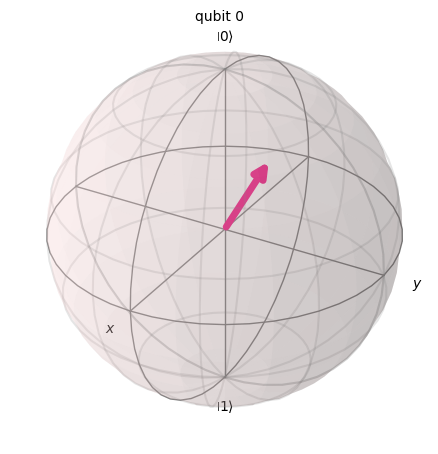

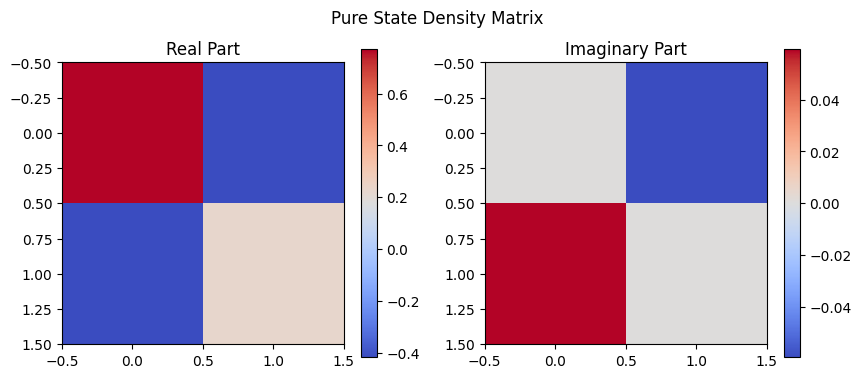

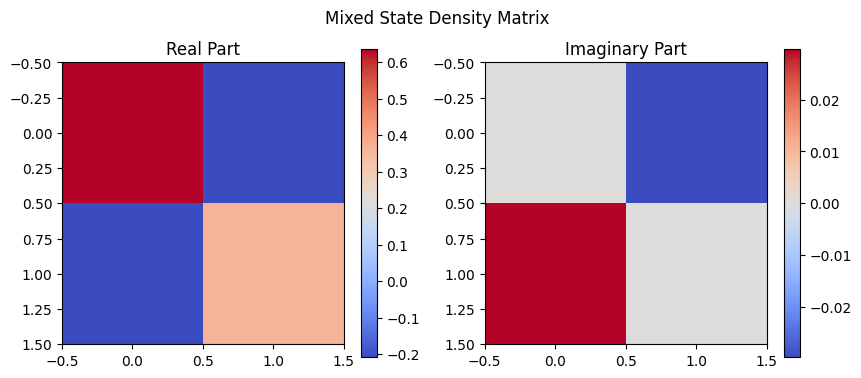

Metrics
--------------------------------
Mixing Probability     : 0.50
Noise Type             : Depolarizing
Noise Strength         : 0.00
State Fidelity         : 0.7500


In [2]:
# ==========================================================
# Quantum Density Matrix & Mixed States Analyzer
# ==========================================================

!pip install qiskit qiskit-aer ipywidgets matplotlib pylatexenc --quiet

# ----------------------------------------------------------
# Imports
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

from qiskit import QuantumCircuit
from qiskit.quantum_info import (
    Statevector,
    DensityMatrix,
    state_fidelity
)
from qiskit_aer.noise import NoiseModel, depolarizing_error, phase_damping_error
from qiskit.visualization import plot_bloch_multivector

# ----------------------------------------------------------
# Helper: Create Pure State
# ----------------------------------------------------------
def create_pure_state(theta, phi):
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    return Statevector.from_instruction(qc)

# ----------------------------------------------------------
# Helper: Create Mixed State
# ----------------------------------------------------------
def create_mixed_state(theta, phi, mix_prob):
    pure_state = create_pure_state(theta, phi)
    rho_pure = DensityMatrix(pure_state)

    maximally_mixed = DensityMatrix(np.eye(2) / 2)
    rho_mixed = (1 - mix_prob) * rho_pure + mix_prob * maximally_mixed

    return rho_pure, rho_mixed

# ----------------------------------------------------------
# Noise Model
# ----------------------------------------------------------
def create_noise_model(noise_type, strength):
    noise = NoiseModel()
    if noise_type == "Depolarizing":
        error = depolarizing_error(strength, 1)
    else:
        error = phase_damping_error(strength)

    noise.add_all_qubit_quantum_error(error, ["ry", "rz"])
    return noise

# ----------------------------------------------------------
# Density Matrix Heatmap
# ----------------------------------------------------------
def plot_density_matrix(rho, title):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    im0 = ax[0].imshow(np.real(rho.data), cmap="coolwarm")
    ax[0].set_title("Real Part")
    plt.colorbar(im0, ax=ax[0])

    im1 = ax[1].imshow(np.imag(rho.data), cmap="coolwarm")
    ax[1].set_title("Imaginary Part")
    plt.colorbar(im1, ax=ax[1])

    fig.suptitle(title)
    plt.show()

# ----------------------------------------------------------
# Main Analysis
# ----------------------------------------------------------
def run_analysis(theta, phi, mix_prob, noise_type, noise_strength):
    clear_output(wait=True)

    print("STEP 4: Density Matrix & Decoherence Analysis\n")

    # Create states
    rho_pure, rho_mixed = create_mixed_state(theta, phi, mix_prob)

    # Apply noise
    noise_model = create_noise_model(noise_type, noise_strength)
    noisy_rho = DensityMatrix(rho_mixed.data)

    # Fidelity
    fidelity = state_fidelity(rho_pure, rho_mixed)

    # Bloch Spheres
    print("Pure State Bloch Sphere")
    display(plot_bloch_multivector(rho_pure))

    print("Mixed State Bloch Sphere (Shrinkage)")
    display(plot_bloch_multivector(rho_mixed))

    # Density Matrix Visualization
    plot_density_matrix(rho_pure, "Pure State Density Matrix")
    plot_density_matrix(rho_mixed, "Mixed State Density Matrix")

    # Metrics
    print("Metrics")
    print("--------------------------------")
    print(f"Mixing Probability     : {mix_prob:.2f}")
    print(f"Noise Type             : {noise_type}")
    print(f"Noise Strength         : {noise_strength:.2f}")
    print(f"State Fidelity         : {fidelity:.4f}")

# ----------------------------------------------------------
# UI Controls
# ----------------------------------------------------------
theta_slider = widgets.FloatSlider(
    value=1.0, min=0, max=np.pi, step=0.1,
    description="θ"
)

phi_slider = widgets.FloatSlider(
    value=0.5, min=0, max=2*np.pi, step=0.1,
    description="φ"
)

mix_slider = widgets.FloatSlider(
    value=0.0, min=0, max=1.0, step=0.05,
    description="Mix Prob"
)

noise_selector = widgets.Dropdown(
    options=["Depolarizing", "Phase Damping"],
    description="Noise"
)

noise_slider = widgets.FloatSlider(
    value=0.0, min=0, max=0.3, step=0.01,
    description="Noise Str"
)

run_button = widgets.Button(
    description="Run Analysis",
    button_style="success"
)

def on_run_clicked(b):
    run_analysis(
        theta_slider.value,
        phi_slider.value,
        mix_slider.value,
        noise_selector.value,
        noise_slider.value
    )

run_button.on_click(on_run_clicked)

# ----------------------------------------------------------
# UI Layout
# ----------------------------------------------------------
display(
    widgets.VBox([
        widgets.HTML("<h2 style='text-align:center;'>Quantum Density Matrix & Mixed States Analyzer</h2>"),
        widgets.HTML("<p style='text-align:center;'>From pure states to realistic decohered quantum systems</p><hr>"),

        widgets.HTML("<b>Step 1:</b> Prepare quantum state"),
        theta_slider,
        phi_slider,

        widgets.HTML("<b>Step 2:</b> Create mixed state"),
        mix_slider,

        widgets.HTML("<b>Step 3:</b> Add noise"),
        noise_selector,
        noise_slider,

        widgets.HTML("<b>Step 4:</b> Analyze"),
        run_button,

        widgets.HTML("<hr><p style='font-size:0.8em; text-align:center;'>Qiskit | Density Matrices | Decoherence</p>")
    ])
)
